<a href="https://colab.research.google.com/github/khagerthey/FDS/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
url = 'https://raw.githubusercontent.com/khagerthey/Portfolio/main/supermarket_sales%20-%20Sheet1.csv'
data = pd.read_csv(url)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
print(data.describe())


        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

In [8]:
#Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

#View rows with missing values
rows_with_missing = data[data.isnull().any(axis=1)]
print(rows_with_missing)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [9]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


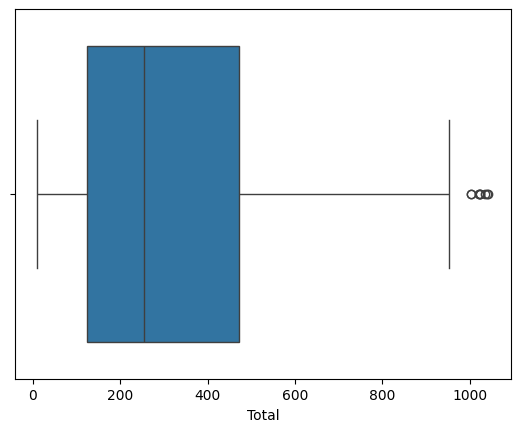

      Invoice ID Branch       City Customer type  Gender         Product line  \
166  234-65-2137      C  Naypyitaw        Normal    Male   Home and lifestyle   
167  687-47-8271      A     Yangon        Normal    Male  Fashion accessories   
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   
357  554-42-2417      C  Naypyitaw        Normal  Female    Sports and travel   
422  271-88-8734      C  Naypyitaw        Member  Female  Fashion accessories   
557  283-26-5248      C  Naypyitaw        Member  Female   Food and beverages   
699  751-41-9720      C  Naypyitaw        Normal    Male   Home and lifestyle   
792  744-16-7898      B   Mandalay        Normal  Female   Home and lifestyle   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   

     Unit price  Quantity  Tax 5%     Total       Date   Time      Payment  \
166       95.58        10  47.790  1003.590 2019-01-16  13:32         Cash   
167       98.98        10  49.490

In [10]:
# Visualize potential outliers using boxplots
import matplotlib.pyplot as plt
import seaborn as sns

# Check outliers in the 'Total' column
sns.boxplot(x=data['Total'])
plt.show()

# Identifying statistical outliers using IQR (Interquartile Range)
Q1 = data['Total'].quantile(0.25)
Q3 = data['Total'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Total'] < (Q1 - 1.5 * IQR)) | (data['Total'] > (Q3 + 1.5 * IQR))]
print(outliers)


In [11]:
# Check unique values in categorical columns
for column in data.select_dtypes(include=['object']).columns:
    print(f'Unique values in {column}:')
    print(data[column].unique())
    print('\n')


Unique values in Invoice ID:
['750-67-8428' '226-31-3081' '631-41-3108' '123-19-1176' '373-73-7910'
 '699-14-3026' '355-53-5943' '315-22-5665' '665-32-9167' '692-92-5582'
 '351-62-0822' '529-56-3974' '365-64-0515' '252-56-2699' '829-34-3910'
 '299-46-1805' '656-95-9349' '765-26-6951' '329-62-1586' '319-50-3348'
 '300-71-4605' '371-85-5789' '273-16-6619' '636-48-8204' '549-59-1358'
 '227-03-5010' '649-29-6775' '189-17-4241' '145-94-9061' '848-62-7243'
 '871-79-8483' '149-71-6266' '640-49-2076' '595-11-5460' '183-56-6882'
 '232-16-2483' '129-29-8530' '272-65-1806' '333-73-7901' '777-82-7220'
 '280-35-5823' '554-53-8700' '354-25-5821' '228-96-1411' '617-15-4209'
 '132-32-9879' '370-41-7321' '727-46-3608' '669-54-1719' '574-22-5561'
 '326-78-5178' '162-48-8011' '616-24-2851' '778-71-5554' '242-55-6721'
 '399-46-5918' '106-35-6779' '635-40-6220' '817-48-8732' '120-06-4233'
 '285-68-5083' '803-83-5989' '347-34-2234' '199-75-8169' '853-23-2453'
 '877-22-3308' '838-78-4295' '109-28-2512' '232-

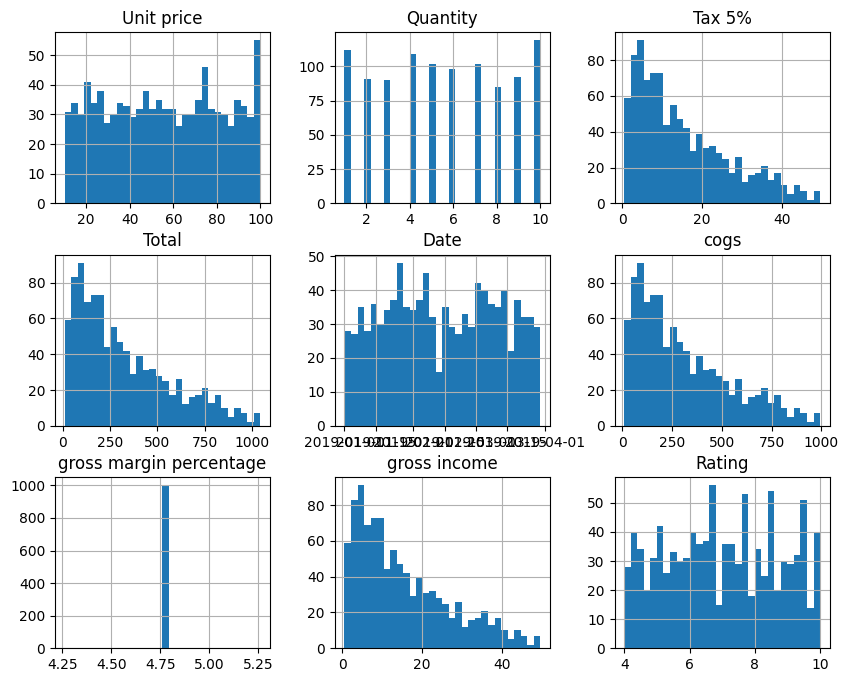

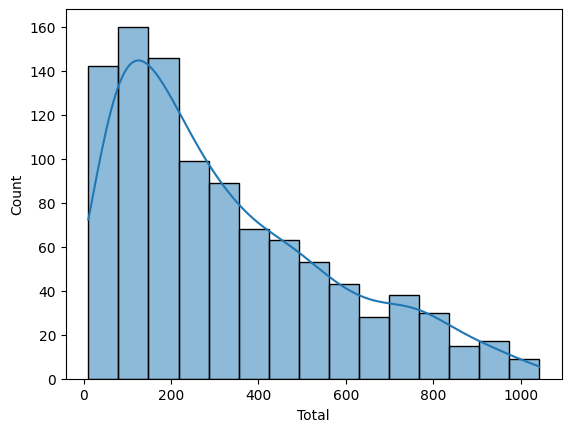

In [12]:
# Visualize distribution of numerical columns
data.hist(bins=30, figsize=(10, 8))
plt.show()

# Checking the distribution of a specific column
sns.histplot(data['Total'], kde=True)
plt.show()


In [13]:
# Check for negative values in the 'Total' column
negative_values = data[data['Total'] < 0]
print(negative_values)


Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []


In [14]:
# Summary statistics of numerical columns
print(data.describe())

# Detailed overview of the dataset
print(data.info())


        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000              1000.000000   
mean   2019-02-14 00:05:45.600000   307.58738                 4.761905   
min           2019-01-01 00:00:00    10.17000                 4.761905   
25%           2019-01-24 00:00:00   118.49750                 4.761905   
50%           2019-02-13 00:00:00   241.76000                 4.761905   
75%   

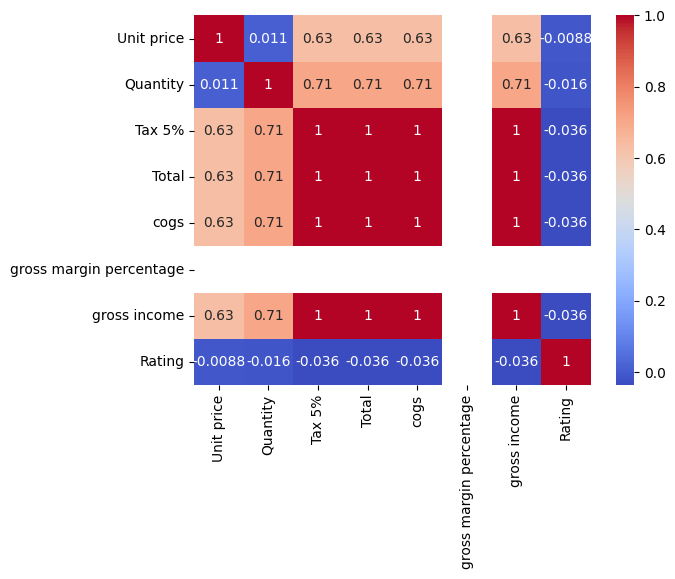

In [16]:
# Correlation matrix
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Summary statistics for numerical columns
summary_stats = data.describe()
print(summary_stats)


        Unit price     Quantity       Tax 5%        Total  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean     55.672130     5.510000    15.379369   322.966749   
min      10.080000     1.000000     0.508500    10.678500   
25%      32.875000     3.000000     5.924875   124.422375   
50%      55.230000     5.000000    12.088000   253.848000   
75%      77.935000     8.000000    22.445250   471.350250   
max      99.960000    10.000000    49.650000  1042.650000   
std      26.494628     2.923431    11.708825   245.885335   

                             Date        cogs  gross margin percentage  \
count                        1000  1000.00000              1000.000000   
mean   2019-02-14 00:05:45.600000   307.58738                 4.761905   
min           2019-01-01 00:00:00    10.17000                 4.761905   
25%           2019-01-24 00:00:00   118.49750                 4.761905   
50%           2019-02-13 00:00:00   241.76000                 4.761905   
75%   

In [18]:
# Total sales by product line
sales_by_product = data.groupby('Product line')['Total'].sum()
print(sales_by_product)


Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


In [19]:
# Average rating by product line
average_rating = data.groupby('Product line')['Rating'].mean()
print(average_rating)


Product line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265
Name: Rating, dtype: float64


In [20]:
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Total sales by month
sales_by_month = data.resample('M', on='Date')['Total'].sum()
print(sales_by_month)


Date
2019-01-31    116291.868
2019-02-28     97219.374
2019-03-31    109455.507
Freq: M, Name: Total, dtype: float64


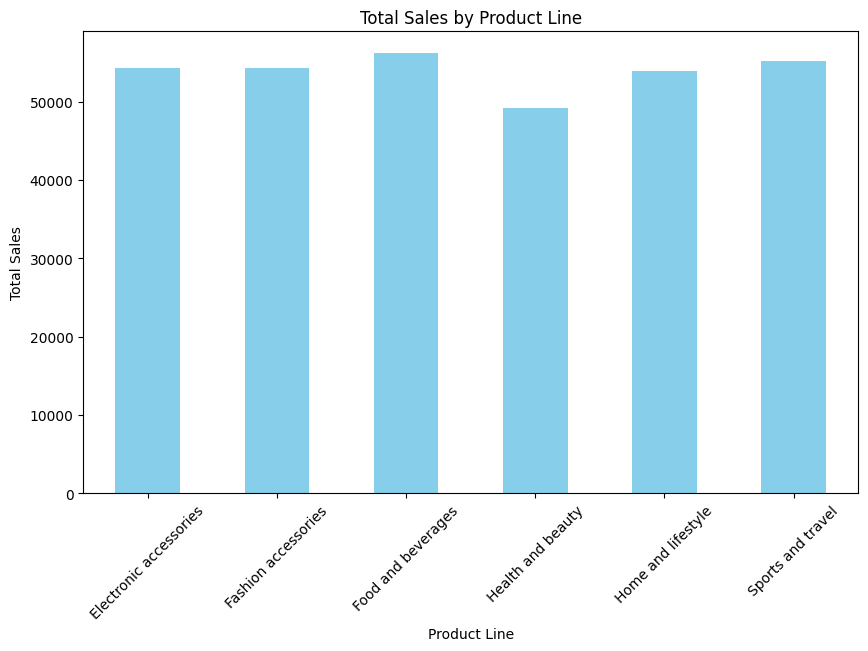

In [21]:
# Bar plot for sales by product line
sales_by_product.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


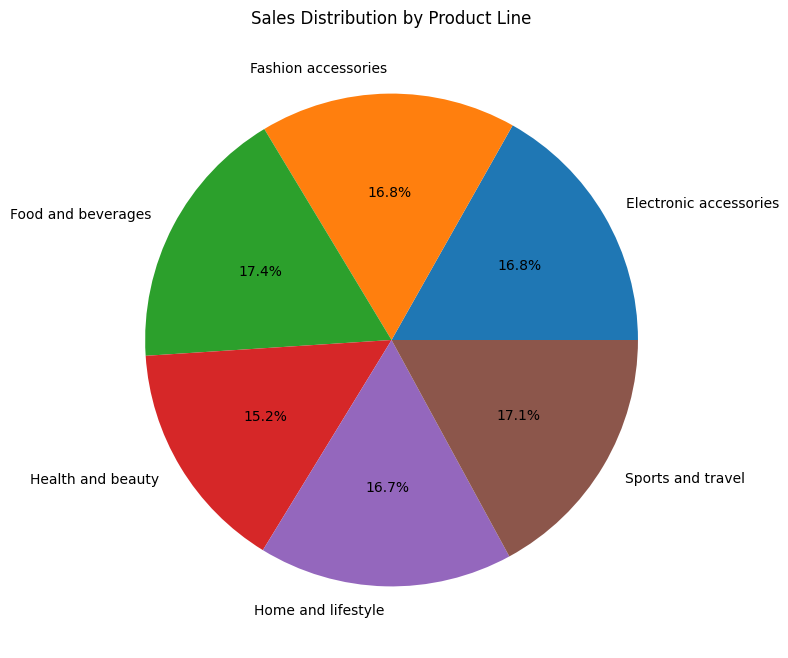

In [22]:
# Pie chart for sales distribution by product line
sales_by_product.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sales Distribution by Product Line')
plt.ylabel('')
plt.show()


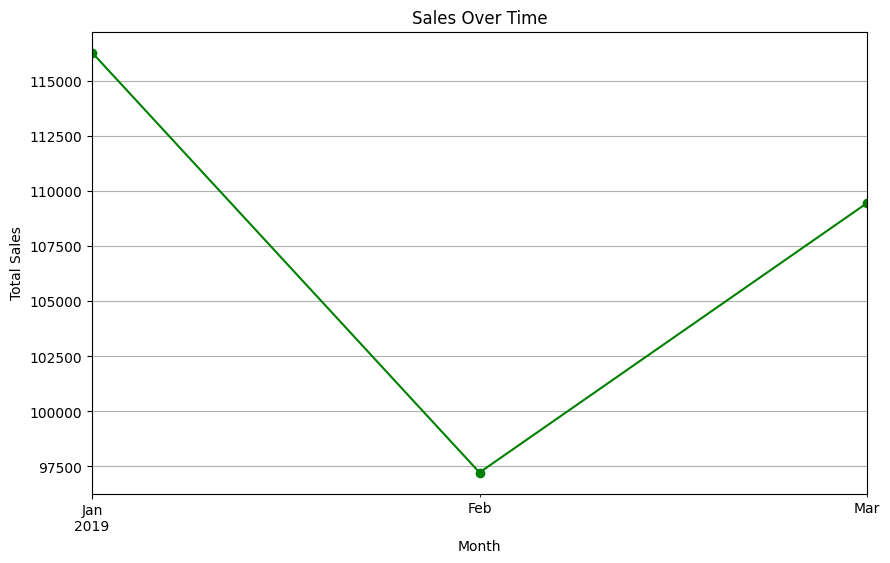

In [23]:
# Line plot for sales over time
sales_by_month.plot(kind='line', marker='o', color='green', figsize=(10, 6))
plt.title('Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


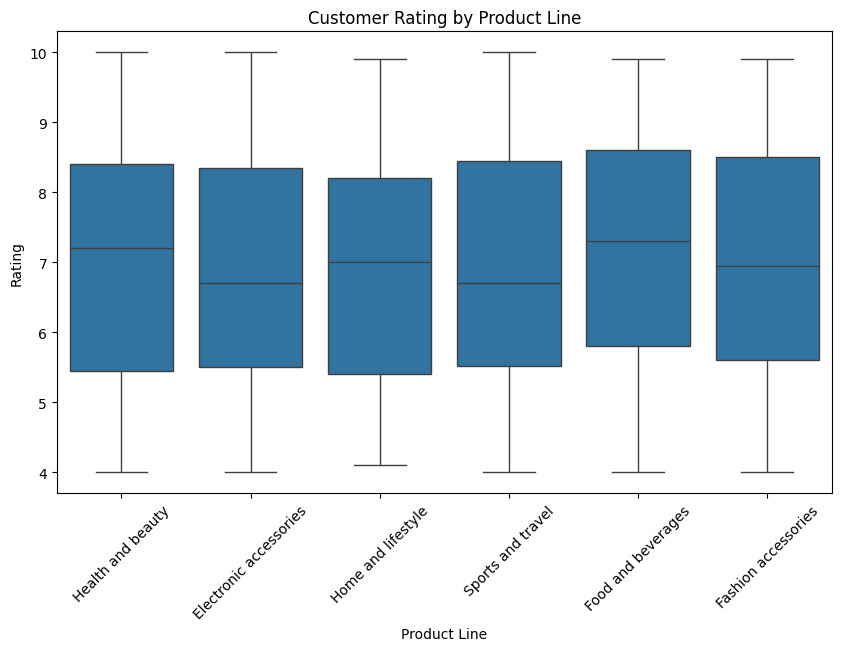

In [24]:
# Box plot for customer ratings by product line
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Rating', data=data)
plt.title('Customer Rating by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


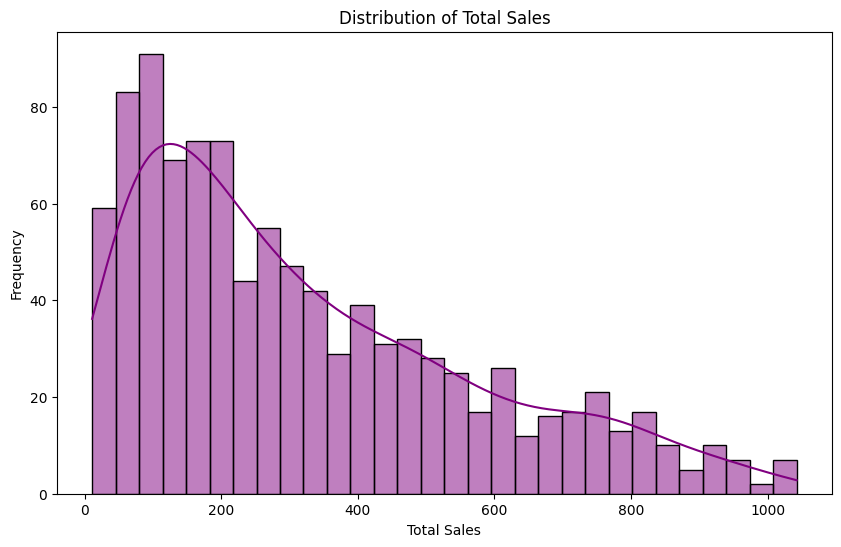

In [25]:
# Histogram for the distribution of total sales
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], bins=30, kde=True, color='purple')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()


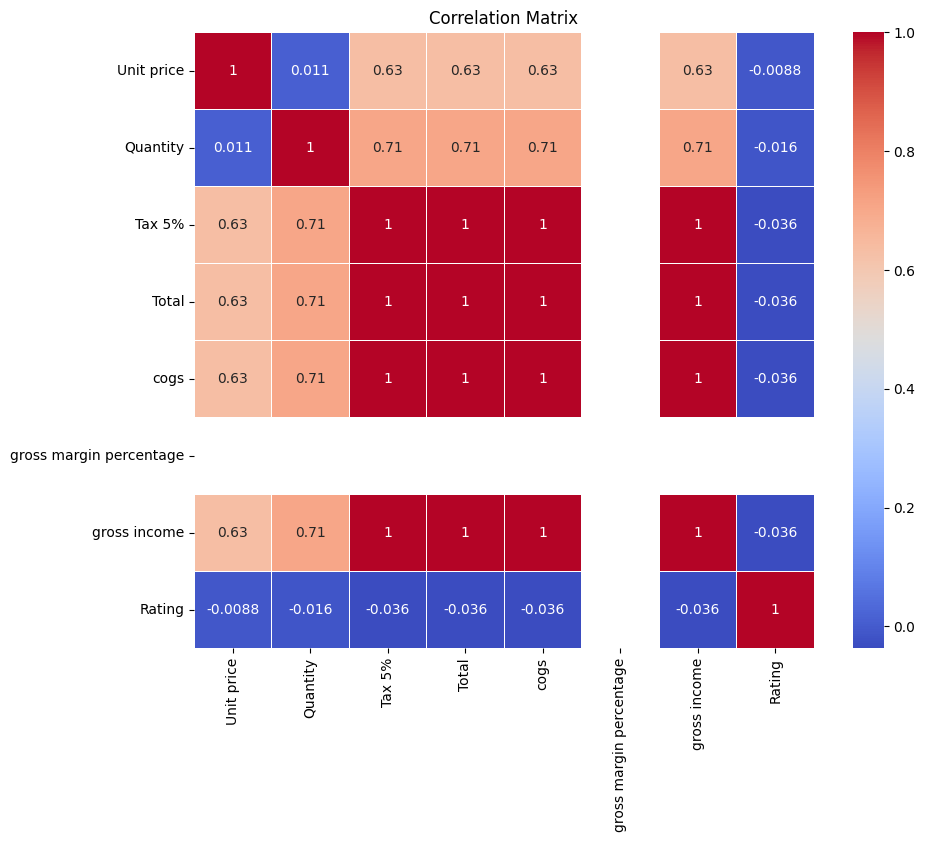

In [27]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

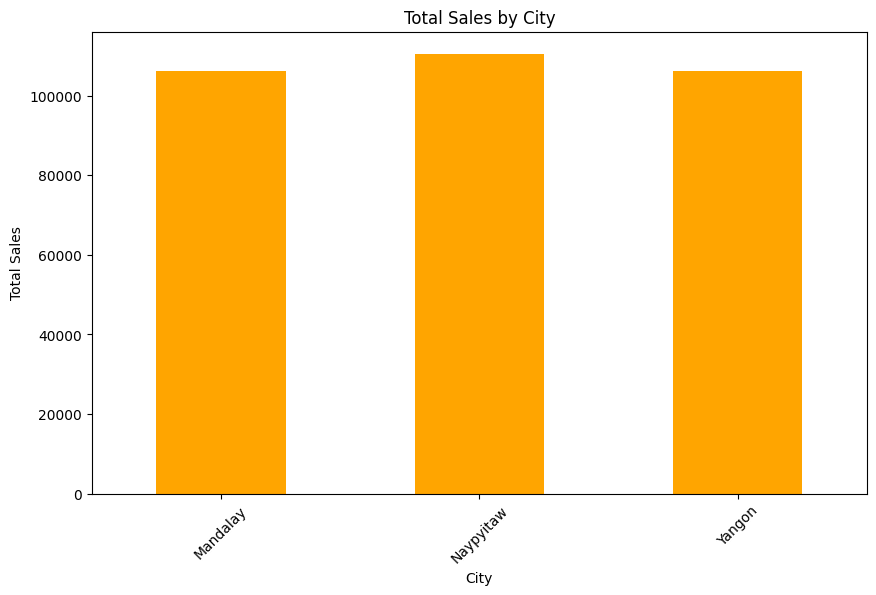

In [28]:
# Total sales by city
sales_by_city = data.groupby('City')['Total'].sum()

# Bar plot for sales by city
sales_by_city.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


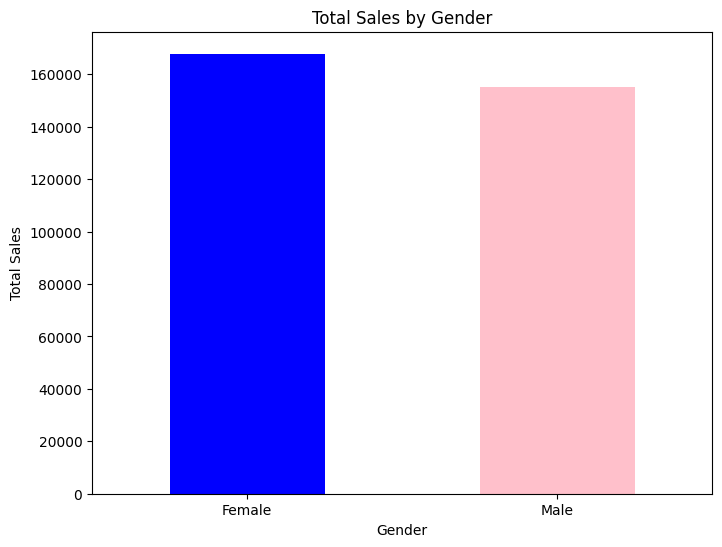

In [29]:
# Sales by gender
sales_by_gender = data.groupby('Gender')['Total'].sum()

# Bar plot for sales by gender
sales_by_gender.plot(kind='bar', color=['blue', 'pink'], figsize=(8, 6))
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


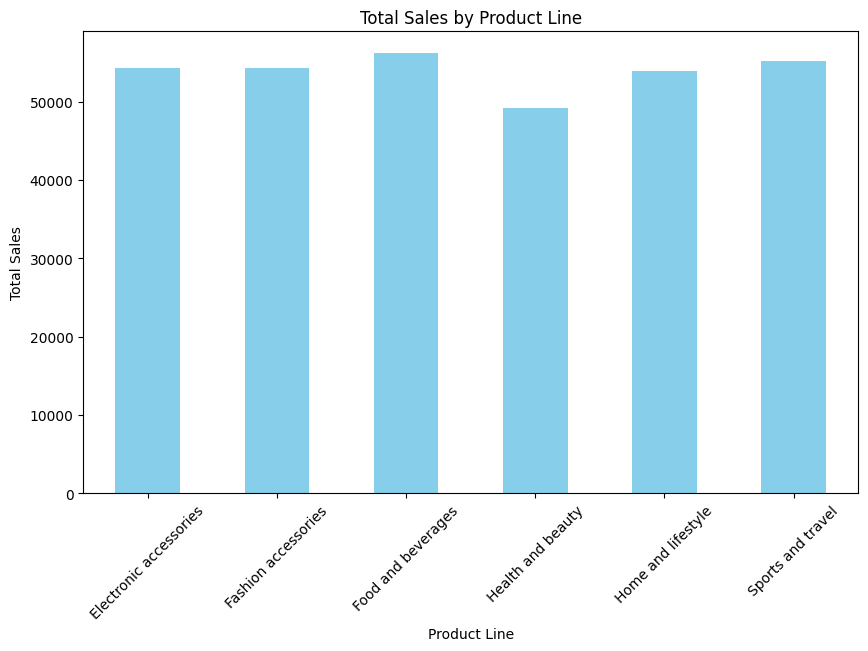

In [30]:
# Saving the bar plot for sales by product line
plt.figure(figsize=(10, 6))
sales_by_product.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.savefig('sales_by_product_line.png')
plt.show()
